# Análise de Dados da Prova do ENEM 2022 - Parte 2: Explorando Indicadores Socioeconômicos e Suas Correlações com o Desempenho dos Candidatos

Essa é a segunda parte da análise de dados da prova do ENEM 2022. Nesta etapa, a atenção se voltou para os indicadores socioeconômicos e a busca por compreender suas correlações com as notas dos candidatos.

Nesta análise, evidencia-se o papel fundamental que esses indicadores desempenham na trajetória educacional dos estudantes. Descobertas que lançam luz sobre a importância de se investir em políticas públicas que promovam o desenvolvimento socioeconômico das regiões e ofereçam oportunidades igualitárias de aprendizado.

Ao explorar as correlações entre os indicadores socioeconômicos e as notas dos candidatos, essa análise oferece um panorama abrangente e informativo sobre a dinâmica educacional do Brasil. Esses insights são essenciais para fomentar discussões e ações que visem aprimorar o sistema educacional, promover a equidade e fornecer oportunidades iguais a todos os estudantes.

### Importando o dataset criado por mim na parte 1 da análise

In [1]:
import pandas as pd
mediaEnemMunic = pd.read_csv('mediaEnemPorMunicipio.csv', sep=',')

In [2]:
mediaEnemMunic

,NO_MUNICIPIO_ESC,CO_MUNICIPIO_ESC,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,Abadia de Goiás,5200050.0,611.111111,470.605882,475.105556,458.300000,477.217647
1,Abadia dos Dourados,3100104.0,666.250000,472.766667,516.025000,507.087500,537.646667
2,Abadiânia,5200100.0,644.358974,499.265714,525.533333,516.635897,560.051429
3,Abaetetuba,1500107.0,608.169839,476.868413,499.734846,479.685212,494.182435
4,Abaeté,3100203.0,655.172414,513.936207,556.582759,547.808621,594.905172
...,...,...,...,...,...,...,...
5260,Áurea,4301552.0,600.000000,492.225000,541.450000,534.625000,520.025000
5261,Ângulo,4101150.0,553.333333,491.237500,493.188889,445.166667,492.187500
5262,Érico Cardoso,2900504.0,597.333333,455.826667,488.273333,469.506667,456.446667
5263,Óbidos,1505106.0,567.872340,461.983516,483.845745,466.504255,470.313187


### Importando o dataset sobre o IDHM por município, além das coordenadas geográficas de cada um

In [4]:
adhm = pd.read_csv('atlas2013_dadosbrutos_pt com lat long e altura.csv', sep=',')

### Cruzando os dados dos datasets criados

In [5]:
mediaEnemIDH = pd.merge(mediaEnemMunic, adhm, how = 'left', left_on=['CO_MUNICIPIO_ESC'], right_on=['Codmun7'])

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1145: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [7]:
mediaEnemIDH = mediaEnemIDH.drop_duplicates('CO_MUNICIPIO_ESC')
mediaEnemIDH

,NO_MUNICIPIO_ESC,CO_MUNICIPIO_ESC,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,ANO,UF,Codmun6,...,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,Abadia de Goiás,5200050.0,611.111111,470.605882,475.105556,458.300000,477.217647,1991.0,GOIÁS,520005.0,...,NaN,NaN,4128.0,4115.0,0.171,0.189,0.408,0.183,0.658,0.563
3,Abadia dos Dourados,3100104.0,666.250000,472.766667,516.025000,507.087500,537.646667,1991.0,MINAS GERAIS,310010.0,...,NaN,NaN,6410.0,6408.0,0.161,0.266,0.449,0.225,0.728,0.551
6,Abadiânia,5200100.0,644.358974,499.265714,525.533333,516.635897,560.051429,1991.0,GOIÁS,520010.0,...,NaN,NaN,9300.0,9076.0,0.168,0.199,0.410,0.188,0.656,0.560
9,Abaetetuba,1500107.0,608.169839,476.868413,499.734846,479.685212,494.182435,1991.0,PARÁ,150010.0,...,NaN,NaN,99691.0,98987.0,0.163,0.181,0.386,0.175,0.669,0.490
12,Abaeté,3100203.0,655.172414,513.936207,556.582759,547.808621,594.905172,1991.0,MINAS GERAIS,310020.0,...,NaN,NaN,20273.0,20273.0,0.155,0.194,0.417,0.180,0.717,0.561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15308,Áurea,4301552.0,600.000000,492.225000,541.450000,534.625000,520.025000,1991.0,RIO GRANDE DO SUL,430155.0,...,NaN,NaN,3963.0,3963.0,0.117,0.223,0.408,0.180,0.705,0.535
15311,Ângulo,4101150.0,553.333333,491.237500,493.188889,445.166667,492.187500,1991.0,PARANÁ,410115.0,...,NaN,NaN,2477.0,2412.0,0.194,0.316,0.459,0.269,0.702,0.513
15314,Érico Cardoso,2900504.0,597.333333,455.826667,488.273333,469.506667,456.446667,1991.0,BAHIA,290050.0,...,NaN,NaN,10933.0,10463.0,0.061,0.110,0.285,0.090,0.638,0.403
15317,Óbidos,1505106.0,567.872340,461.983516,483.845745,466.504255,470.313187,1991.0,PARÁ,150510.0,...,NaN,NaN,42039.0,41390.0,0.134,0.143,0.347,0.140,0.625,0.479


# Gráfico de dispersão da nota de redação por IDHM

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

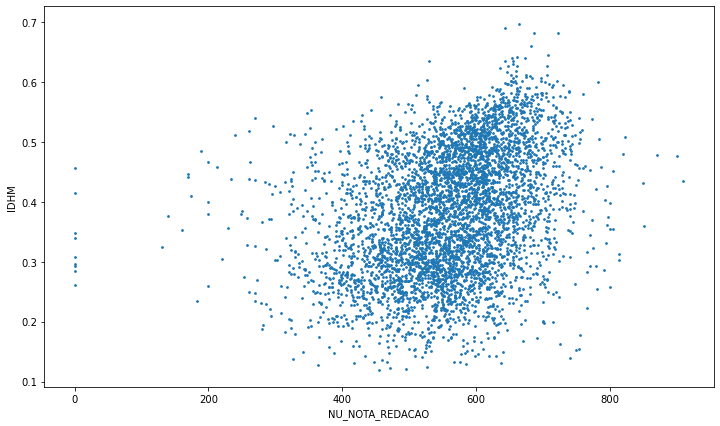

In [14]:
import matplotlib.pyplot as plt

mediaEnemIDH.plot.scatter('NU_NOTA_REDACAO', 'IDHM', figsize=(12,7), s=3)

In [15]:
mediaRed = mediaEnemIDH.NU_NOTA_REDACAO.mean()
mediaIDHM = mediaEnemIDH.IDHM.mean()

quadrante1 = (mediaEnemIDH.IDHM < mediaIDHM) & (mediaEnemIDH.NU_NOTA_REDACAO < mediaRed)
quadrante2 = (mediaEnemIDH.IDHM > mediaIDHM) & (mediaEnemIDH.NU_NOTA_REDACAO < mediaRed)
quadrante3 = (mediaEnemIDH.IDHM > mediaIDHM) & (mediaEnemIDH.NU_NOTA_REDACAO > mediaRed)
quadrante4 = (mediaEnemIDH.IDHM < mediaIDHM) & (mediaEnemIDH.NU_NOTA_REDACAO > mediaRed)

quadrante 1: 28.55%, baixo IDHM, baixa nota
quadrante 2: 15.38%, alto IDHM, baixa nota
quadrante 3: 32.48%, alto IDHM, alta nota
quadrante 4: 18.54%, baixo IDHM, baixa nota


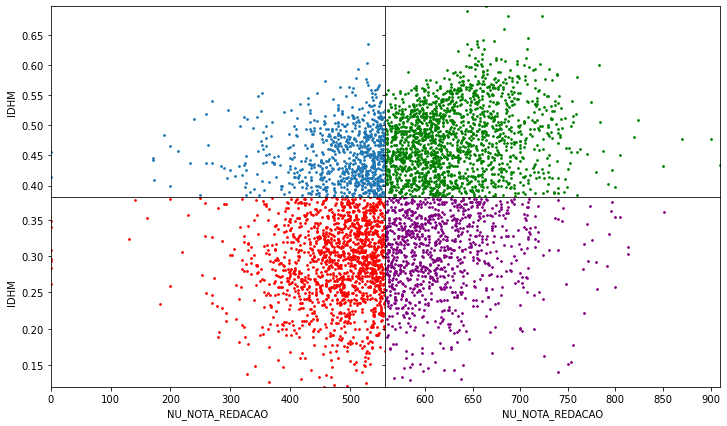

In [29]:
fig, ax = plt.subplots(2,2, figsize=(12,  7), sharex='col', sharey='row')
plt.subplots_adjust(wspace = 0, hspace = 0)

minRed = mediaEnemIDH.NU_NOTA_REDACAO.min()
maxRed = mediaEnemIDH.NU_NOTA_REDACAO.max()
minIDH = mediaEnemIDH.IDHM.min()
maxIDH = mediaEnemIDH.IDHM.max()

mediaEnemIDH1 = mediaEnemIDH[quadrante1]
mediaEnemIDH1.plot.scatter('NU_NOTA_REDACAO', 'IDHM', ax=ax[1,0], s = 3, xlim = (minRed, mediaRed), ylim = (minIDH, mediaIDHM), color= 'red')
print('quadrante 1: {}%, baixo IDHM, baixa nota'.format(round(100*(len(mediaEnemIDH1)/len(mediaEnemIDH)),2)))

mediaEnemIDH2 = mediaEnemIDH[quadrante2]
mediaEnemIDH2.plot.scatter('NU_NOTA_REDACAO', 'IDHM', ax=ax[0,0], s = 3, xlim = (minRed, mediaRed), ylim = (mediaIDHM, maxIDH))
print('quadrante 2: {}%, alto IDHM, baixa nota'.format(round(100*(len(mediaEnemIDH2)/len(mediaEnemIDH)),2)))

mediaEnemIDH3 = mediaEnemIDH[quadrante3]
mediaEnemIDH3.plot.scatter('NU_NOTA_REDACAO', 'IDHM', ax=ax[0,1], s = 3, xlim = (mediaRed, maxRed), ylim = (mediaIDHM, maxIDH), color = 'green')
print('quadrante 3: {}%, alto IDHM, alta nota'.format(round(100*(len(mediaEnemIDH3)/len(mediaEnemIDH)),2)))

mediaEnemIDH4 = mediaEnemIDH[quadrante4]
mediaEnemIDH4.plot.scatter('NU_NOTA_REDACAO', 'IDHM', ax=ax[1,1], s = 3, xlim = (mediaRed, maxRed), ylim = (minIDH, mediaIDHM), color = 'purple')
print('quadrante 4: {}%, baixo IDHM, baixa nota'.format(round(100*(len(mediaEnemIDH4)/len(mediaEnemIDH)),2)))

Ao realizar o gráfico de dispersão relacionando a nota da redação do ENEM com o Índice de Desenvolvimento Humano Municipal (IDHM), pudemos desvendar informações cruciais sobre os fatores que podem influenciar o desempenho dos estudantes na prova.

Uma análise mais profunda do gráfico revela uma tendência clara: municípios com um alto IDHM apresentam uma maior concentração de alunos com as melhores notas na redação do ENEM. Esse padrão sugere que o desenvolvimento humano das localidades está fortemente relacionado ao sucesso acadêmico dos estudantes.

Essa conexão não é mera coincidência. Um alto IDHM está associado a melhores condições educacionais e de renda, o que, por sua vez, reflete diretamente na qualidade do ensino oferecido e no acesso a recursos educacionais nas escolas. Além disso, municípios com um alto IDHM tendem a oferecer um ambiente socioeconômico mais favorável, onde a população tem acesso a uma infraestrutura mais adequada e a oportunidades de desenvolvimento pessoal e profissional.

Por outro lado, municípios com baixo IDHM apresentam uma maior proporção de alunos com notas mais baixas na redação do ENEM. Essa disparidade sugere que essas regiões enfrentam desafios significativos em termos de qualidade da educação e acesso a recursos educacionais adequados. Questões socioeconômicas, como a falta de infraestrutura educacional e desigualdades na distribuição de renda, podem ser fatores que impactam negativamente o desempenho dos estudantes nessas localidades.

Essa correlação entre a nota da redação e o IDHM deve ser encarada como um sinal de alerta. Ela enfatiza a necessidade de direcionar esforços e investimentos para garantir uma educação mais equitativa em todo o país. Políticas públicas voltadas para a redução das desigualdades socioeconômicas, o aprimoramento da infraestrutura escolar e a valorização dos profissionais da educação são fundamentais para criar um ambiente mais propício ao desenvolvimento acadêmico dos estudantes em todas as regiões.

Outro ponto importante a considerar é a possibilidade de estudantes provenientes de municípios com baixo IDHM enfrentarem barreiras adicionais no processo de preparação para o ENEM. A falta de acesso a cursinhos preparatórios, bibliotecas e outras ferramentas de estudo pode limitar suas oportunidades de aprimoramento acadêmico. Assim, é essencial buscar alternativas para promover a democratização do conhecimento e garantir que todos os candidatos tenham condições justas de preparação para o exame.

# Mapa de média de notas

In [30]:
municipios = pd.read_csv('municipios.csv')

In [31]:
mediaEnemIDHLoc = pd.merge(mediaEnemIDH, municipios, how='left', left_on=['CO_MUNICIPIO_ESC'], right_on=['codigo_ibge'])

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1145: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [53]:
mediaEnemRd = mediaEnemIDHLoc['NU_NOTA_REDACAO']

<AxesSubplot:title={'center':'Media de nota da redacao por municipio'}, xlabel='LONG', ylabel='LAT'>

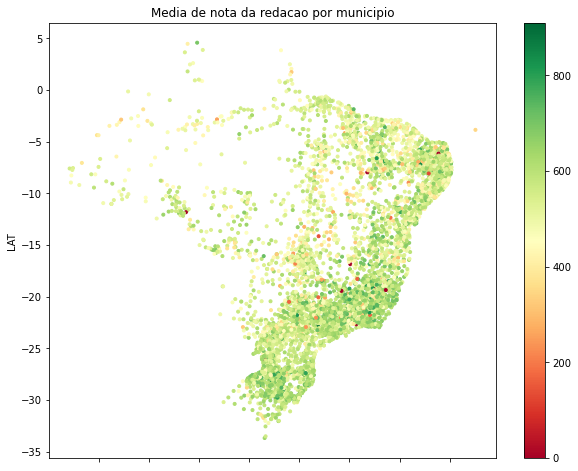

In [54]:
mediaEnemIDHLoc.plot.scatter('LONG', 'LAT', c=(mediaEnemRd),
                             cmap='RdYlGn', figsize=(10,8), s=9, title='Media de nota da redacao por municipio')

<AxesSubplot:title={'center':'NOTA_LC'}, xlabel='LONG', ylabel='LAT'>

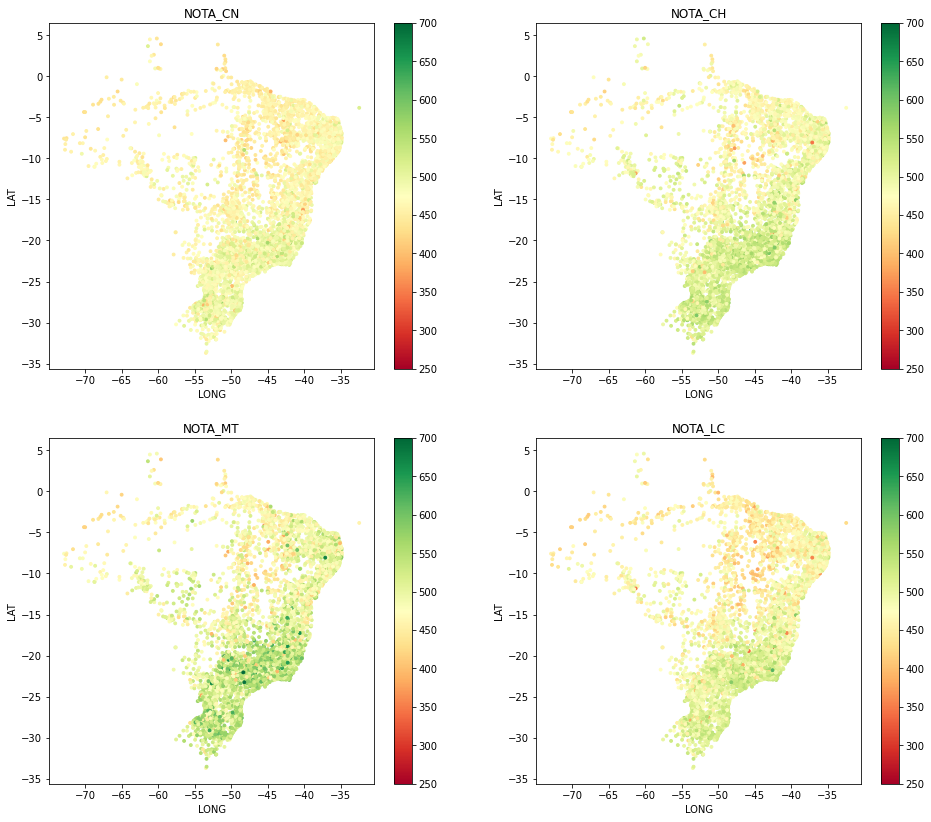

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(16, 14))

mediaEnemIDHLoc.plot.scatter('LONG', 'LAT', c=(mediaEnemIDHLoc['NU_NOTA_CN']),
                             cmap='RdYlGn', s=8, title='NOTA_CN', ax=ax[0,0], vmin=250, vmax=700)
mediaEnemIDHLoc.plot.scatter('LONG', 'LAT', c=(mediaEnemIDHLoc['NU_NOTA_CH']),
                             cmap='RdYlGn', s=8, title='NOTA_CH', ax=ax[0,1], vmin=250, vmax=700)
mediaEnemIDHLoc.plot.scatter('LONG', 'LAT', c=(mediaEnemIDHLoc['NU_NOTA_MT']),
                             cmap='RdYlGn', s=8, title='NOTA_MT', ax=ax[1,0], vmin=250, vmax=700)
mediaEnemIDHLoc.plot.scatter('LONG', 'LAT', c=(mediaEnemIDHLoc['NU_NOTA_LC']),
                             cmap='RdYlGn', s=8, title='NOTA_LC', ax=ax[1,1], vmin=250, vmax=700)

Este é um gráfico de dispersão que mostra a média de notas dos candidatos, distribuidos pelo Brasil. Podendo observar as regiões com maiores ou menores notas

Uma observação notável é a confirmação do padrão identificado anteriormente na análise. As cores das bolinhas, que refletem as médias de notas nas diferentes disciplinas, corroboram a ideia de que as provas de matemática e ciências humanas tendem a obter melhores resultados, representadas pelas bolinhas esverdeadas, enquanto as provas de linguagens e ciências da natureza apresentam médias de notas relativamente mais baixas, indicadas pelas bolinhas avermelhadas. Essa constatação pode revelar nuances específicas nas habilidades dos candidatos em cada área do conhecimento.

Outro aspecto interessante é a observação das discrepâncias regionais nas médias de notas. Nota-se que as regiões sul e sudeste do país apresentam médias de notas mais elevadas, enquanto as regiões norte e nordeste tendem a ter médias de notas mais baixas. Essa disparidade pode ser correlacionada com o padrão identificado anteriormente sobre o Índice de Desenvolvimento Humano Municipal (IDHM), onde municípios com maior IDHM obtiveram melhores médias de notas. Isso sugere que o desenvolvimento socioeconômico e educacional das regiões pode influenciar diretamente o desempenho dos estudantes.

Essa análise reforça a importância de políticas públicas voltadas para a equidade educacional em todas as regiões do país. Investir em infraestrutura escolar, formação de professores, recursos educacionais e programas de apoio aos estudantes pode ser fundamental para nivelar as oportunidades e elevar o desempenho acadêmico em regiões com IDHM mais baixo. Além disso, a identificação das áreas específicas onde os candidatos apresentam mais dificuldades pode subsidiar a implementação de estratégias pedagógicas direcionadas para fortalecer essas habilidades. 